## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 2
---------------------------------------

GOALS:

1. Start using Python
2. Start looking at Data!

----------------------------------------------------------

This homework has **TWO** warm-up problems and **FOUR** problems.


## Hello World!

### Warm up Problem 1

Write python code that will print your name and run the cell.

In [13]:
('Hello World')


'Hello World'

## Installing Modules

### Warm up Problem 2

Install the modules that you will need to run the rest of the code. You can copy and paste the commands from the class notes. This might take a minute or two to run... go get a cup of coffee :)

In [ ]:
# Copy and paste the code here:
### This will take a while to run - just let it go.
!conda install -y numpy
!conda install -y pandas
!conda install -y matplotlib
!conda install -y plotly
!conda install -y itables
!conda install -y statsmodels
!conda install -y -c conda-forge python-kaleido 

In [ ]:
!conda config --show channels

In [ ]:
!conda install -y itables

## Let's do some Data Science.

We will explore some data about how countries vote at the United Nations General Assembly. You should follow along with the notes and/or class video.

I am breaking this into parts and having you copy and paste the code so you can start to identify what the different parts of the code do.

-------------------------------
### Importing Packages:
-------------------------------

Every time we start a new project we will import the packages that will help us do the analysis. Copy and paste all of the imports in the cell below.

* numpy = mathematical and number packages for python
* pandas = pretty tables, dataframes, and data analysis packages
* matplotlib.pyplot = nice looking graphs
* plotly = nice looking graphs.
* itables = pretty looking tables that have a search bar

In [26]:
# Copy and paste the code here:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots

-------------------------------
### Get the Data:
-------------------------------

We will practice all sorts of ways to get data into our notebooks. When you use Pandas (pd) to read a csv:

    DF = pd.read_csv(file_location)

you are basically reading in a spreadsheet (Excel). The data for today is stored on my website.

It might take a minute for the data to load.

In [29]:
file_location = 'https://joannabieri.com/introdatascience/data/unvotes.csv'
DF = pd.read_csv(file_location)
years = [int(d.split('-')[0]) for d in DF['date']]
DF['year'] = years
DF = DF.drop('Unnamed: 0',axis=1)


-------------------------------
### Initial Data Exploration:
-------------------------------
-------------------------------
### Show the Data:
-------------------------------

We want to look at what we have. The data is now represented by the variable DF.

In [44]:
# Copy and paste the code here:


### Problem 1

Do some initial exploration of this data and write about it in the markdown cell below.

* How man columns are there?
* What do the columns represent?
* What countries are there?
* Can you search for a country you are interested in?
* How many rows are there?
* What other observations do you have?



1. 6 columns
2. votes of countries
3. United States, Canada, Cuba, Dominican Republic, Mexico, Guatemala, Honduras, El Salvador, Nicaragua, Panama.
4. Guatemala
5. 15 rows

-------------------------------
### Make Python Explore the Data!:
-------------------------------

Copy and paste the command that will show you a list of the counties:

In [49]:
# Copy and paste the code here:
country_list = list(DF['country'].unique())

Copy and paste the command that will count up the number of countries:

In [55]:
# Copy and paste the code here:
(pd.DataFrame(country_list,columns=['country']))

,country
0,United States
1,Canada
2,Cuba
3,Dominican Republic
4,Mexico
...,...
195,Kiribati
196,Switzerland
197,Timor-Leste
198,Montenegro


In [57]:
issues_list = list(DF[???].unique())
issues_list

SyntaxError: invalid syntax (616958668.py, line 1)

### Problem 2

Try writing some code for your self. Above we found a countries list by focusing on the column named 'country'. See if you can redo that same code but change it to focus on the column named 'issue'.

What do I expect here:

* First copy and past the code from above
* Then change that code slightly
* Run the cell to see if it worked

In [62]:
# Write your code here
(pd.DataFrame(country_list,columns=['issue']))

,issue
0,United States
1,Canada
2,Cuba
3,Dominican Republic
4,Mexico
...,...
195,Kiribati
196,Switzerland
197,Timor-Leste
198,Montenegro


-------------------------------
### Data Visualization:
-------------------------------

Now we will select three countries that we are interested in and see how their votes have changed over time. Below you should see code that selects: Turkey, United States, and United Kingdom.

**IMPORTANT** These have to be spelled and capitalized exactly like they are in the data. Python is unforgiving of typos!

You can just run the cell below - assuming you have done all the parts above!

In [65]:
countries = ['Turkey', 'United States', 'United Kingdom']
issues = list(DF['issue'].unique())
c_groups = DF.groupby(['country','issue'])
print(issues)

['Human rights', 'Economic development', 'Colonialism', 'Palestinian conflict', 'Arms control and disarmament', 'Nuclear weapons and nuclear material']


Now that we have our focus countries, we can make pretty pictures.

You can just run the cell below - assuming you have done all the parts above!

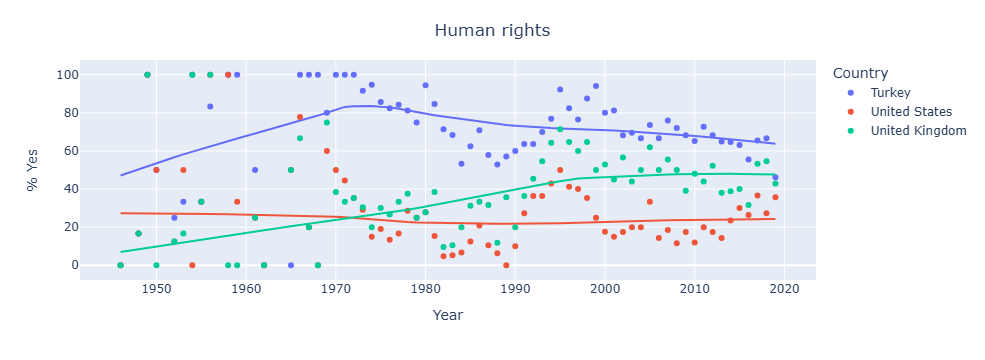

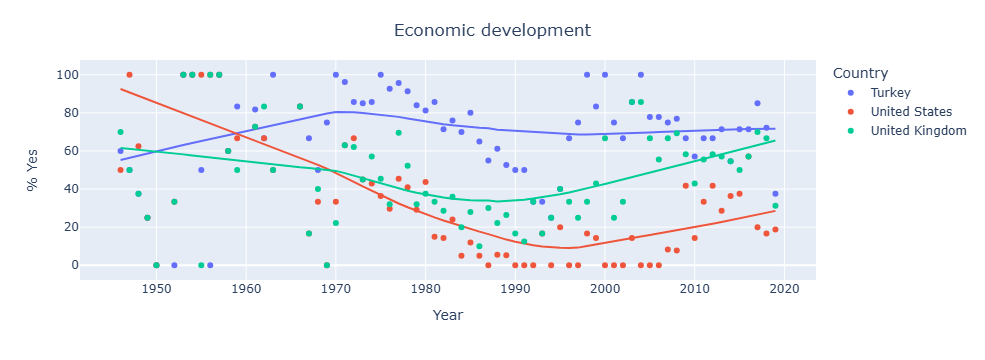

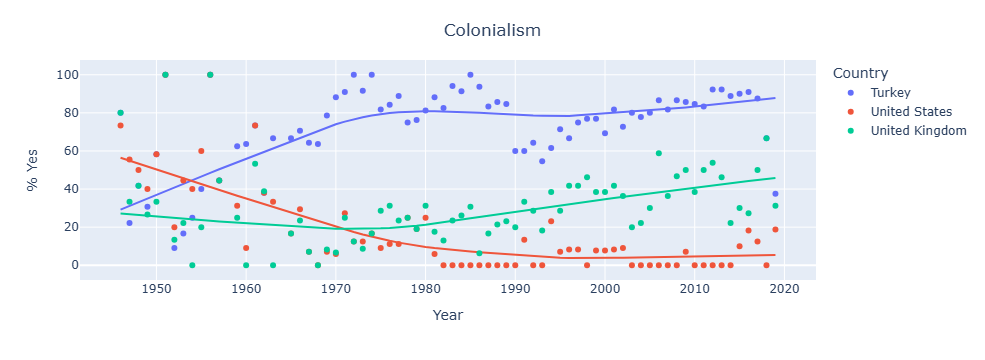

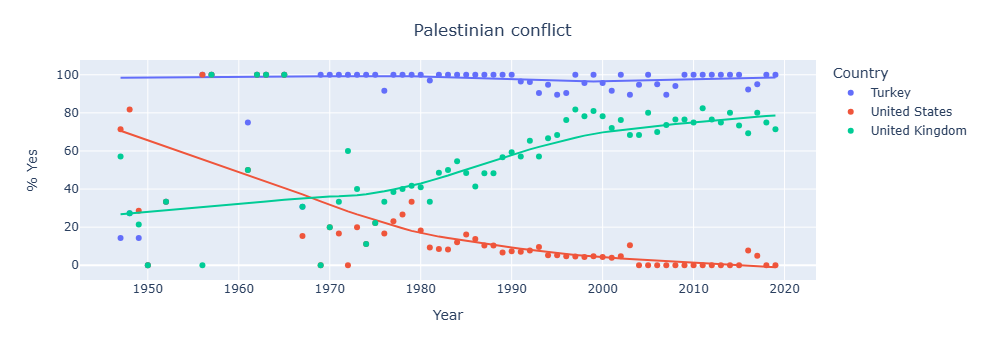

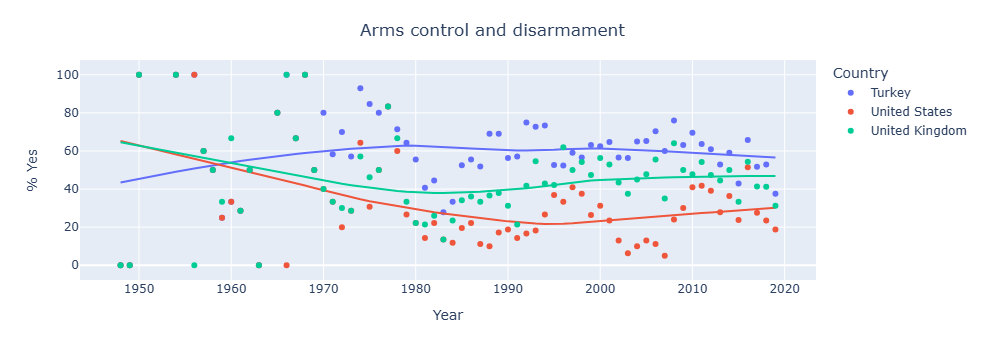

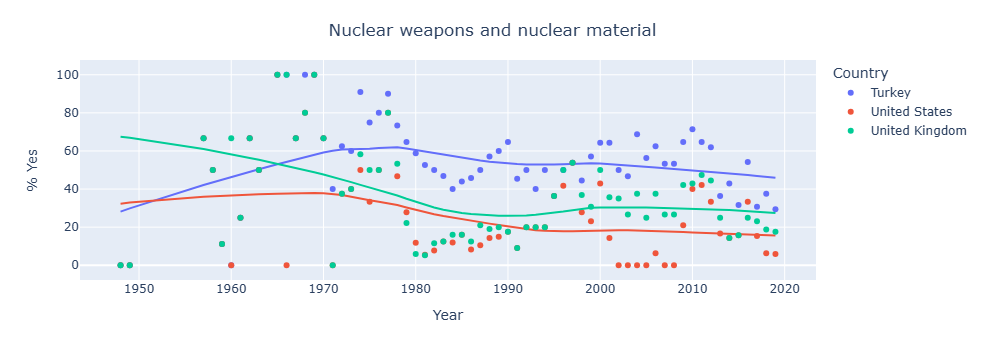

In [70]:
def make_plot(countries,issue):
    '''
    A Python function that takes in the list of countries and issues and makes
    a scatter plot of each issue with a trendline for each country.
    '''
    x_data = []
    y_data = []
    c_data = []
    for cntry in countries:
        my_group = c_groups.get_group((cntry,issue))
        for y in my_group['year'].unique():
            x_data.append(y)
            tot_yes = sum(my_group[my_group['year']==y]['vote']=='yes')
            percent_yes = tot_yes/len(my_group[my_group['year']==y])*100
            y_data.append(percent_yes)
            c_data.append(cntry)

    fig = px.scatter(x=x_data, y=y_data,color=c_data,trendline="lowess",labels={"color": "Country"})

    fig.update_layout(
        title={
            'text': issue + '<br>',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.update_yaxes(title_text="% Yes")
    fig.update_xaxes(title_text="Year")
    fig.show()
    
for iss in issues:
    make_plot(countries,iss)

### Problem 3

Choose one of the graphs produced above (should match the lecture notes) and discuss what you see there:

1. Which issue are you focusing on.
2. What do the graph axis represent?
3. Say in words how the United States votes have changed over time.
4. How do the United States votes compare to the other countries?
5. See if you can come up with one or two questions that interest you about the data in the graph.

**(double click here)**

### Problem 4

Now go back up to where we picked our three focus countries and choose some different ones. Rerun the analysis. If you want you could choose more than three countries. 

Discuss the graph for the same issue but with the new countries.

**(double click here)**

--------------------------------
### You are done with the homework... now what?
--------------------------------

1. Save your changes.
2. In the Git tab, **Stage** your changed files - use the (+) button next to the file.
3. **Commit** your changes by entering a summary and pushing commit.
4. **Push** your changes using the cloud button.
5. Check that your changes are on your GitHub repo (online)
6. **TAKE THE DAILY QUIZ ON CANVAS** the quiz will ask you to copy and past the HTTPS link to your repo for the day.
7. Come to class and get your questions answered.

At the end of the week  you will submit your final versions of the homework on Canvas for grading. For this you can just drag and drop the HW.ipynb files into canvas. 

**IMPORTANT** If this is confusing this first week, don't worry, I can help you and I will be really flexible about these first few deadlines.
